#### Data Analysis done for web_data file. 

In [133]:
# Import Cell

import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import Select, WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from datetime import datetime
import re 
import time
import random 

import seaborn as sns 
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [134]:
# Reading in the dataset

data = pd.read_excel("web_data_8_5.xlsx")
data.head(1)

,Unnamed: 0,Chemical Name,Search Term,Website,Parent Site,Time Scraped (MDT),Product Name,Units,Price,USD_Price,Currency,usd,category_1_name,category_1_value,category_2_name,category_2_value,quantity_value,quantity_number,quantity_units,standardized_units_l_g,q_units_standardized
0,0,C60,C60 chemical product cost site:sigmaaldrich.co...,https://www.msesupplies.com/products/mse-pro-h...,msesupplies,2024-08-05 16:17:40,"MSE PRO High Purity (>99.9%) Fullerene-C60, 1g",1.0,39595.0,39595.0,$,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L


In [135]:
data_1

,Unnamed: 0,Chemical Name,Search Term,Website,Parent Site,Time Scraped (MDT),Product Name,Units,Price,USD_Price,Currency,usd,category_1_name,category_1_value,category_2_name,category_2_value,quantity_value,quantity_number,quantity_units,standardized_units_l_g,q_units_standardized
1,1,C60,C60 chemical product cost site:sigmaaldrich.co...,https://www.sigmaaldrich.com/US/en/product/ald...,sigmaaldrich,2024-08-05 16:18:05,Fullerene-C60,1.0,268.0,268.0,$,1,Quantity,1 G,NaN,NaN,1 G,1.0,G,0.001,L
2,2,C60,C60 chemical product cost site:sigmaaldrich.co...,https://www.sigmaaldrich.com/US/en/product/ald...,sigmaaldrich,2024-08-05 16:18:05,Fullerene-C60,1.0,841.0,841.0,$,1,Quantity,5 G,NaN,NaN,5 G,5.0,G,0.005,L
3,3,C60,C60 chemical product cost site:sigmaaldrich.co...,https://www.tcichemicals.com/US/en/p/B1641,tcichemicals,2024-08-05 16:18:13,Fullerene C60 (pure),1.0,45.0,45.0,$,1,Quantity,100MG,NaN,NaN,100MG,100.0,MG,0.100,L
4,4,C60,C60 chemical product cost site:sigmaaldrich.co...,https://www.tcichemicals.com/US/en/p/B1641,tcichemicals,2024-08-05 16:18:13,Fullerene C60 (pure),1.0,168.0,168.0,$,1,Quantity,500MG,NaN,NaN,500MG,500.0,MG,0.500,L
5,5,C60,C60 chemical product cost site:sigmaaldrich.co...,https://www.tcichemicals.com/US/en/p/B1641,tcichemicals,2024-08-05 16:18:13,Fullerene C60 (pure),1.0,225.0,225.0,$,1,Quantity,1G,NaN,NaN,1G,1.0,G,0.001,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,471,Spiro Ometad,Spiro Ometad chemical product cost site:sigmaa...,https://www.tcichemicals.com/US/en/p/T3672,tcichemicals,2024-08-05 16:50:04,"2,2',7,7'-Tetrakis-(N,N-di-4-methoxyphenylamin...",1,708.0,708.0,$,1,Quantity,5G,NaN,NaN,5G,5.0,G,0.005,L
472,472,Spiro Ometad,Spiro Ometad chemical product cost site:sigmaa...,https://www.sigmaaldrich.com/US/en/product/ald...,sigmaaldrich,2024-08-05 16:50:18,Spiro-MeOTAD,1,437.0,437.0,$,1,Quantity,1 G,NaN,NaN,1 G,1.0,G,0.001,L
473,473,Spiro Ometad,Spiro Ometad chemical product cost site:sigmaa...,https://www.sigmaaldrich.com/US/en/product/ald...,sigmaaldrich,2024-08-05 16:50:18,Spiro-MeOTAD,1,1.0,1.0,$,1,Quantity,5 G,NaN,NaN,5 G,5.0,G,0.005,L
474,474,Spiro Ometad,Spiro Ometad chemical product cost site:sigmaa...,https://www.sigmaaldrich.com/US/en/product/ald...,sigmaaldrich,2024-08-05 16:50:26,"2,4-Spiro-OMeTAD",1,380.0,380.0,$,1,Quantity,500 MG,NaN,NaN,500 MG,500.0,MG,0.500,L


In [136]:
# Filtering the data

# Dropping rows that are missing standardized quantity units or price. 
data_1 = data.dropna(subset=["standardized_units_l_g"])
data_2 = data_1.dropna(subset=["USD_Price"])
data_2["USD_Price/(L/G)"] = data_2["USD_Price"] / data_2["standardized_units_l_g"]  # Producing a new column: price / units. 
data_2["USD_Price/(L/G)_log"] = np.log(data_2["USD_Price/(L/G)"])   # Applying the log function to the previous price / units column to improve analysis.
data_2.replace([np.inf, -np.inf], np.nan, inplace=True) # Replacing all infinite values with None and removing them. 
data_3 = data_2.dropna(subset=["USD_Price/(L/G)"])
d_a = data_2[["Chemical Name", "Parent Site", "Units", "USD_Price", "standardized_units_l_g", "q_units_standardized", "USD_Price/(L/G)", "USD_Price/(L/G)_log"]] # Only the columns that are useful for analysis
d_a

/var/folders/0t/tmx6qgwn1zn5wc0dg4kvq21r3b_lmt/T/ipykernel_78996/4146726072.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["USD_Price/(L/G)"] = data_2["USD_Price"] / data_2["standardized_units_l_g"]  # Producing a new column: price / units.
/var/folders/0t/tmx6qgwn1zn5wc0dg4kvq21r3b_lmt/T/ipykernel_78996/4146726072.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["USD_Price/(L/G)_log"] = np.log(data_2["USD_Price/(L/G)"])   # Applying the log function to the previous price / units colum

,Chemical Name,Parent Site,Units,USD_Price,standardized_units_l_g,q_units_standardized,USD_Price/(L/G),USD_Price/(L/G)_log
1,C60,sigmaaldrich,1.0,268.0,0.001,L,268000.0,12.498742
2,C60,sigmaaldrich,1.0,841.0,0.005,L,168200.0,12.032909
3,C60,tcichemicals,1.0,45.0,0.100,L,450.0,6.109248
4,C60,tcichemicals,1.0,168.0,0.500,L,336.0,5.817111
5,C60,tcichemicals,1.0,225.0,0.001,L,225000.0,12.323856
...,...,...,...,...,...,...,...,...
471,Spiro Ometad,tcichemicals,1,708.0,0.005,L,141600.0,11.860761
472,Spiro Ometad,sigmaaldrich,1,437.0,0.001,L,437000.0,12.987688
473,Spiro Ometad,sigmaaldrich,1,1.0,0.005,L,200.0,5.298317
474,Spiro Ometad,sigmaaldrich,1,380.0,0.500,L,760.0,6.633318


In [137]:
# Dataset - Ready for analysis
d_a

,Chemical Name,Parent Site,Units,USD_Price,standardized_units_l_g,q_units_standardized,USD_Price/(L/G),USD_Price/(L/G)_log
1,C60,sigmaaldrich,1.0,268.0,0.001,L,268000.0,12.498742
2,C60,sigmaaldrich,1.0,841.0,0.005,L,168200.0,12.032909
3,C60,tcichemicals,1.0,45.0,0.100,L,450.0,6.109248
4,C60,tcichemicals,1.0,168.0,0.500,L,336.0,5.817111
5,C60,tcichemicals,1.0,225.0,0.001,L,225000.0,12.323856
...,...,...,...,...,...,...,...,...
471,Spiro Ometad,tcichemicals,1,708.0,0.005,L,141600.0,11.860761
472,Spiro Ometad,sigmaaldrich,1,437.0,0.001,L,437000.0,12.987688
473,Spiro Ometad,sigmaaldrich,1,1.0,0.005,L,200.0,5.298317
474,Spiro Ometad,sigmaaldrich,1,380.0,0.500,L,760.0,6.633318


In [138]:
# Array of unique chemicals
unq_chemicals = d_a["Chemical Name"].unique()
unq_chemicals

array(['C60', 'MeO 2PACz', 'Me 4PACz', '2PACz', 'BCP', 'FAI', 'DMAI',
       'PbBr2', 'PbCl2', 'CsI', 'DMF', 'DMSO', 'PbI2', 'PTAA', 'PFN-Br',
       'MoO3', 'LiTFSI', 'MABr', 'MAI', 'SnI2', '4-tert-butylpyridine',
       'acetonitile', 'methyl acetate', 'GABr', 'LiF', 'TDMASn', 'ITO',
       'AZO', 'IZO', 'Spiro Ometad'], dtype=object)

Plots used in my poster

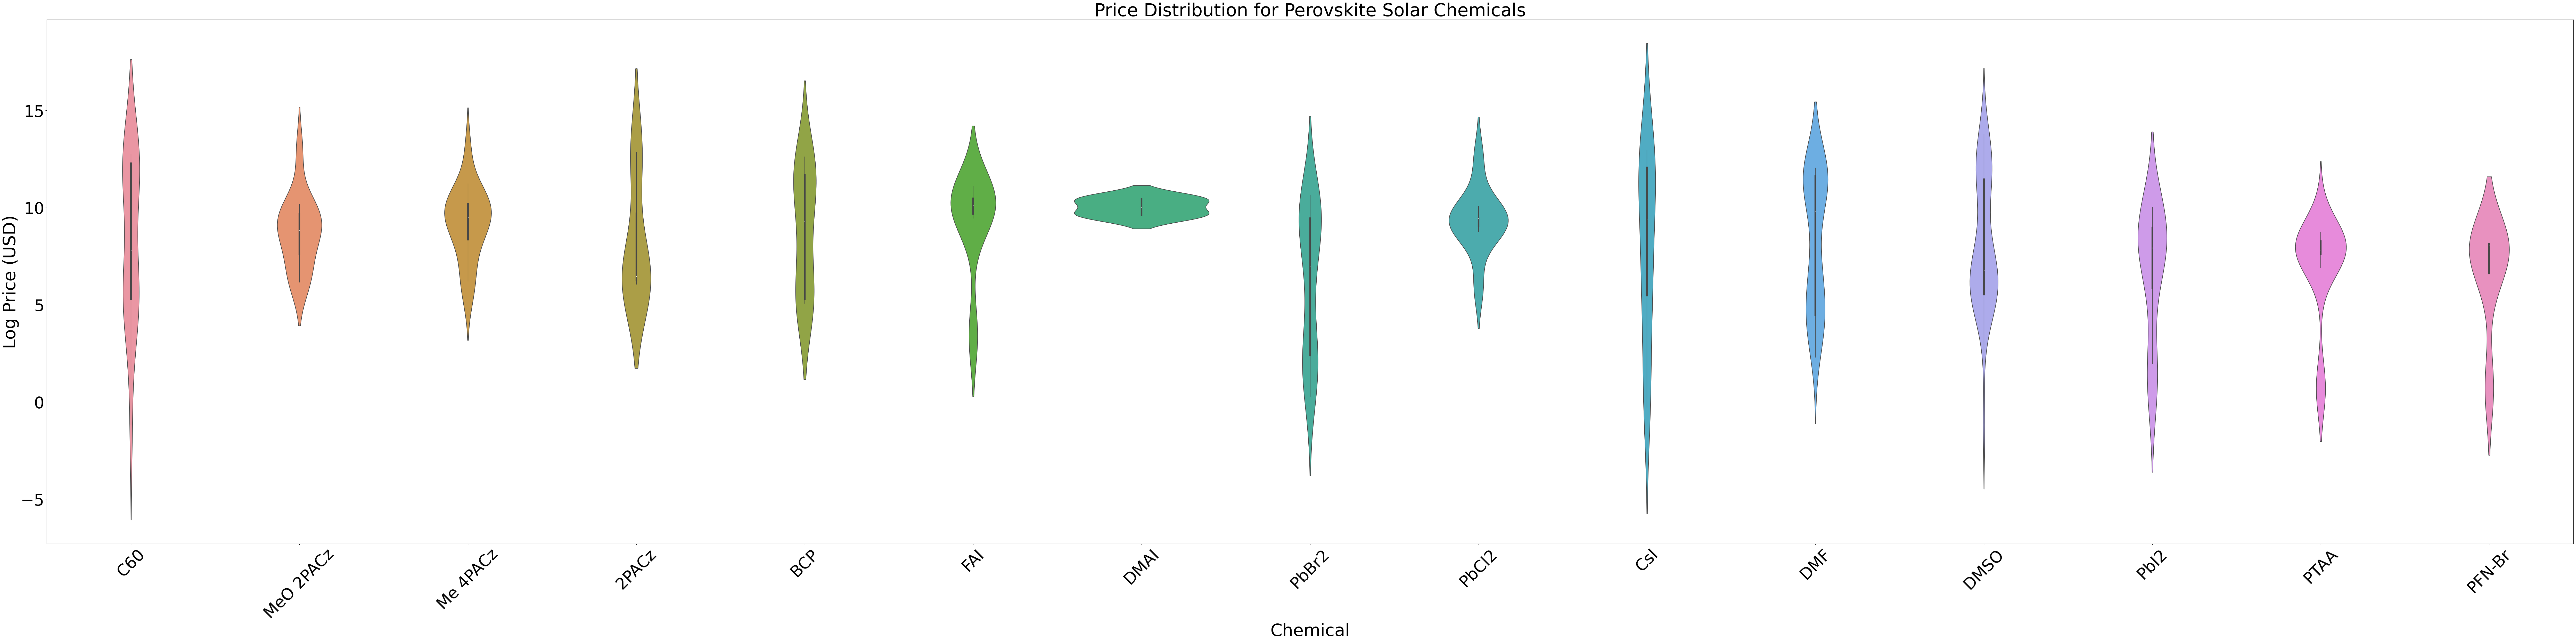

In [139]:
plt.figure(figsize=(100, 25))
sns.violinplot(x='Chemical Name', y='USD_Price/(L/G)_log', data=d_a[d_a["Chemical Name"].isin(unq_chemicals[:15])])

# Add title and labels
plt.title('Price Distribution for Perovskite Solar Chemicals', fontsize=50)
plt.xlabel('Chemical', fontsize=48)
plt.ylabel('Log Price (USD)', fontsize=48)

plt.xticks(fontsize=45)  # X-axis tick labels
plt.yticks(fontsize=45) 

plt.xticks(rotation=45)
plt.tight_layout()
# Show plot
plt.show()

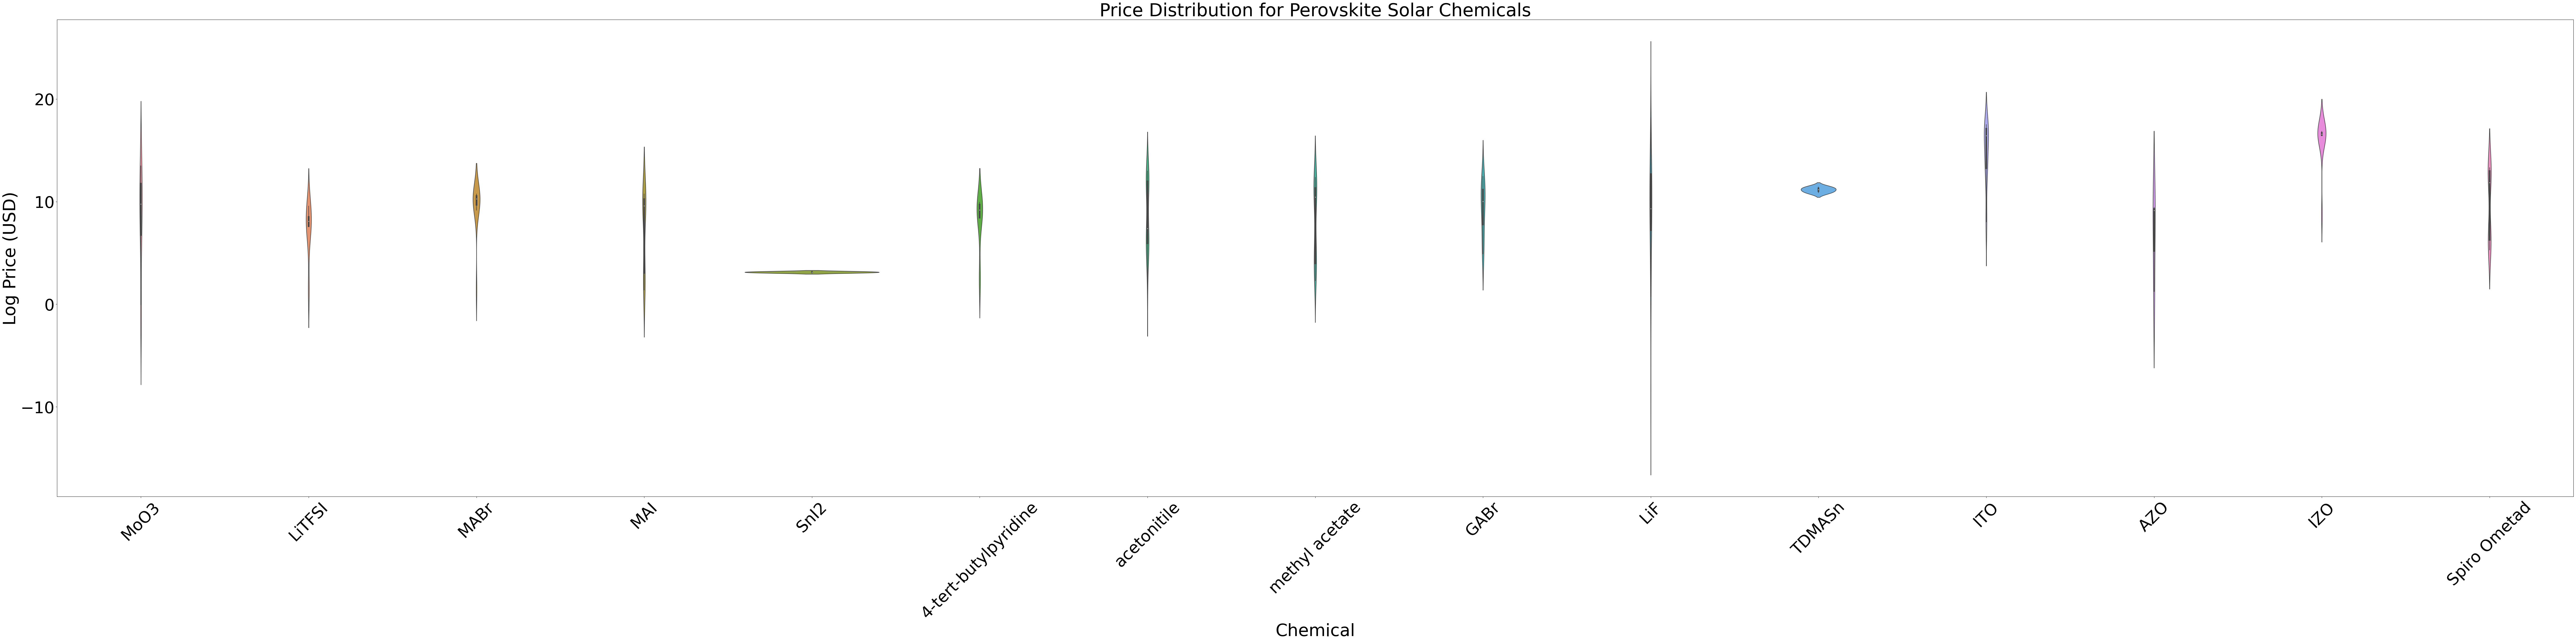

In [140]:
plt.figure(figsize=(100, 25))
sns.violinplot(x='Chemical Name', y='USD_Price/(L/G)_log', data=d_a[d_a["Chemical Name"].isin(unq_chemicals[15:30])])

# Add title and labels
plt.title('Price Distribution for Perovskite Solar Chemicals', fontsize=50)
plt.xlabel('Chemical', fontsize=48)
plt.ylabel('Log Price (USD)', fontsize=48)

plt.xticks(fontsize=45)  # X-axis tick labels
plt.yticks(fontsize=45) 

plt.xticks(rotation=45)
plt.tight_layout()
# Show plot
plt.show()

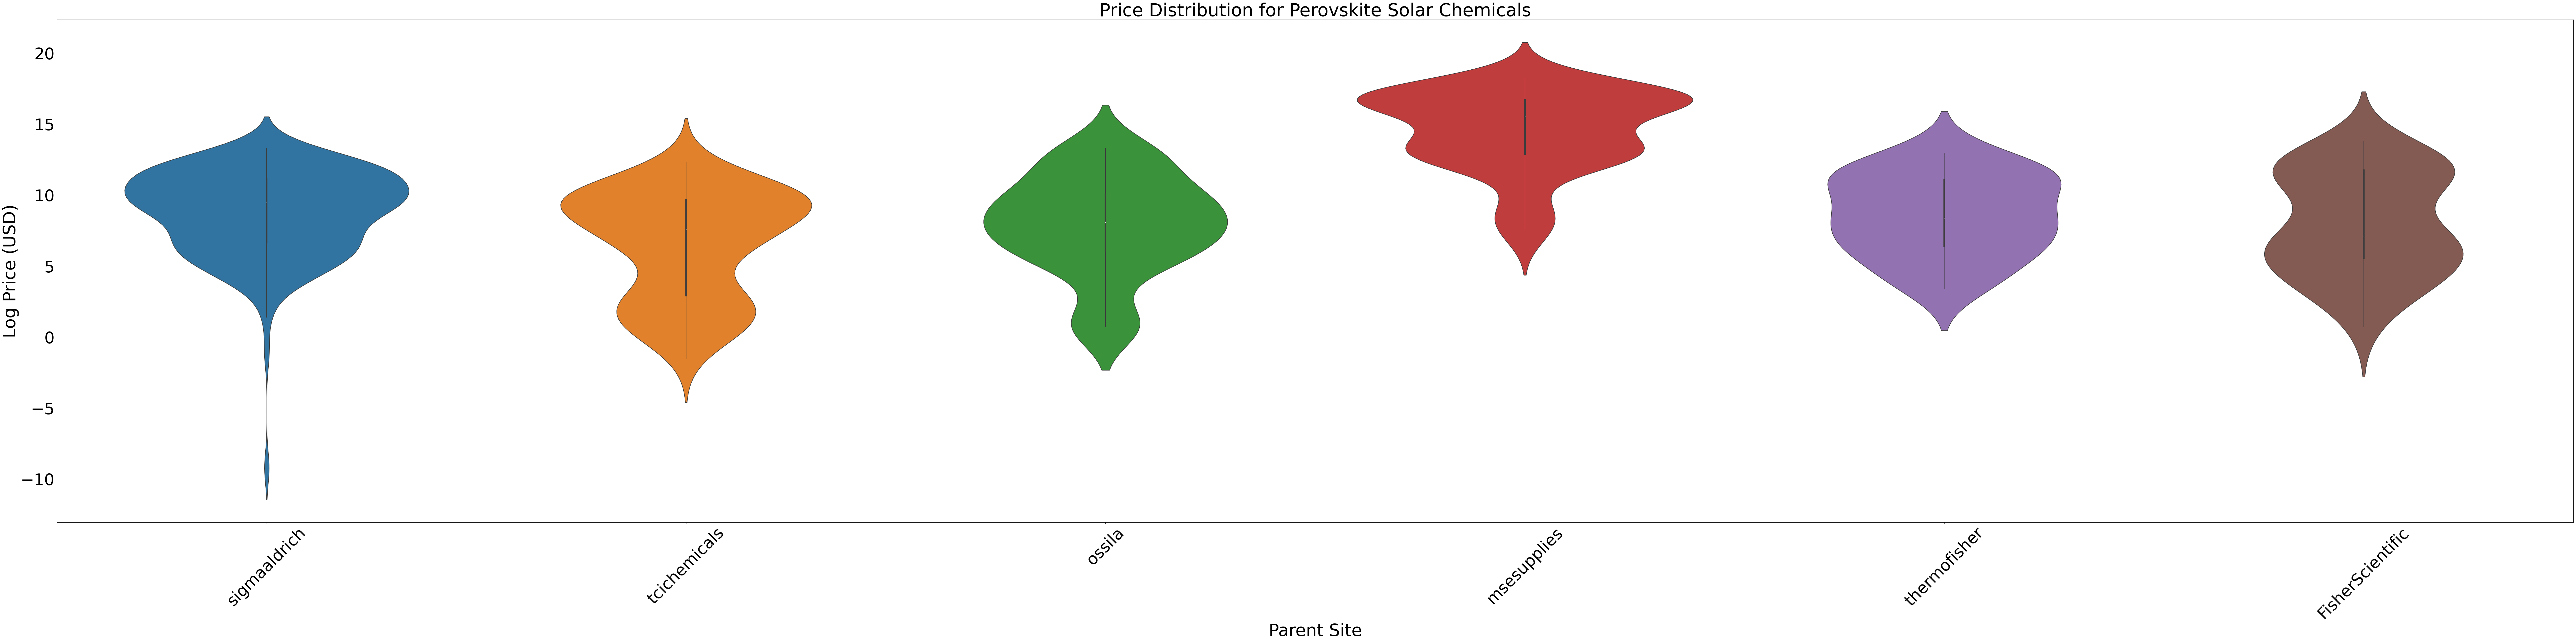

In [141]:
plt.figure(figsize=(100, 25))
sns.violinplot(x='Parent Site', y='USD_Price/(L/G)_log', data=d_a)

# Add title and labels
plt.title('Price Distribution for Perovskite Solar Chemicals', fontsize=50)
plt.xlabel('Parent Site', fontsize=48)
plt.ylabel('Log Price (USD)', fontsize=48)

plt.xticks(fontsize=45)  # X-axis tick labels
plt.yticks(fontsize=45) 

plt.xticks(rotation=45)
plt.tight_layout()
# Show plot
plt.show()